# Termproject Proposal

###                                                                          Submitter: 2019102147 곽윤철    Team member: 2019102234 최승호

# 주제: 합리적 소비를 위한 상품의 마트별 가격과 제품의 용량 및 성분별 가격분석

# 주제 선정 이유

최근 몇년간 물가 상승에 따른 소비자들의 경제적 부담을 줄이기 위해 합리적으로 소비를 할 수 있는 방안을 제공하기 위해서이다. 또한, 소비자의 목적에 맞는 소비를 위한 정보를 제공함으로써 소비자의 Needs & Wants를 충족시키기 위함이다.

# 가설 정의
우리나라에는 여러 대형마트들이 존재한다. 그 중 가장 유명한 홈플러스, 롯데마트, 이마트 중에서 어느 곳이 제품들을 가장 저렴하게 파는지 밝히고자 한다. 또한 제품들의(ex.서울우유, 맛있는 우유 GT 등등) 마트별 가격 차이를 알아내어 소비자의 목적에 맞는 가장 합리적인 제품을 찾고자 한다. 

# 인터넷을 통한 데이터 획득

- 마트별 홈페이지를 통한 상품의 데이터 수집

홈플러스: http://www.homeplus.co.kr/app.exhibition.main.Main.ghs?paper_no=category

롯데마트: http://www.lottemart.com/index.do

이마트: http://emart.ssg.com/main.ssg?Egnb=embi

- 데이터 획득 방법

request 모듈을 통해 get 요청을 하여 html 코드를 받아온다.

BeatifulSoup 모듈을 통해 requests 모듈로 받아온 html 코드에서 필요한 정보를 추출한다.

In [ ]:
import requests # 웹 페이지의 HTML을 가져오는 모듈
from bs4 import BeautifulSoup # HTML을 파싱하는 모듈

# 웹 페이지를 가져온 뒤 BeaytifulSoup 객체로 만듦

# 홈플러스

homeplus_dic = {}

response = requests.get('http://www.homeplus.co.kr/app.exhibition.category.Category.ghs', homeplus_dic)

soup = BeautifulSoup(response.content, 'html.parser')

# 롯데마트

lottemart_dic = {}

response = requests.get('http://www.lottemart.com/category/categoryList.do', lottemart_dic)
    
soup = BeautifulSoup(response.content, 'html.parser')
    
# 이마트

response = requests.get('http://emart.ssg.com/category/listCategoryItem.ssg?dispCtgId=6000023670&page=1')
soup = BeautifulSoup(response.content, 'html.parser')
sum = 0
page_num = 1
total = int(soup.find('em', {'id' : 'area_item_total_count'}).text.strip())

while True:
    response = requests.get('http://emart.ssg.com/category/listCategoryItem.ssg?dispCtgId=6000023670&page={}'.format(page_num))
    soup = BeautifulSoup(response.content, 'html.parser')
    table = soup.find('div', {'id' : 'ty_thmb_view'})
    if sum >= total:
        break
        '''코드'''
            sum += 1
        '''코드'''
            time.sleep(10)
    page_num += 1

## 획득한 데이터 원본

## 홈플러스

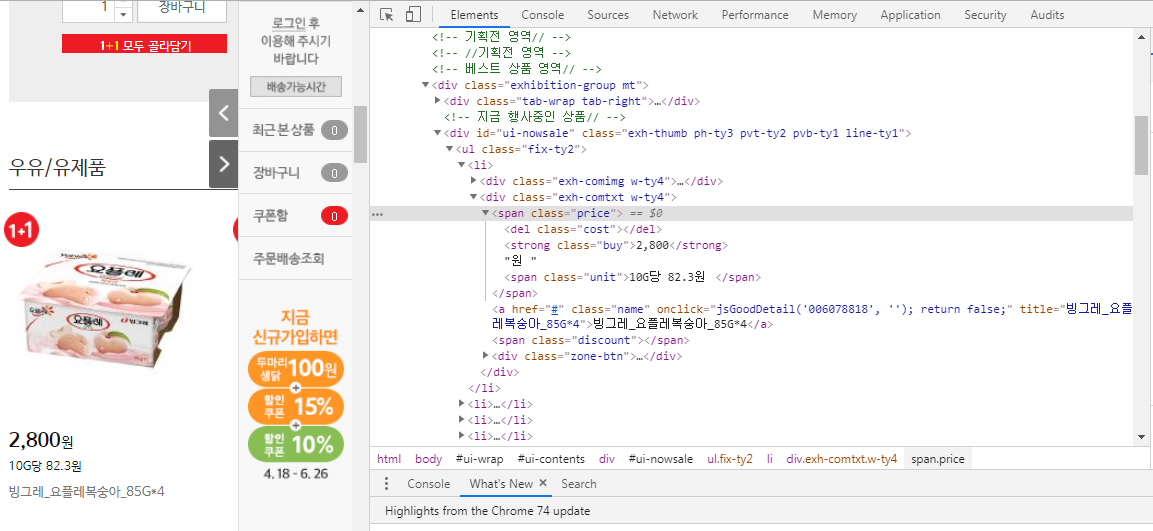

## 롯데마트

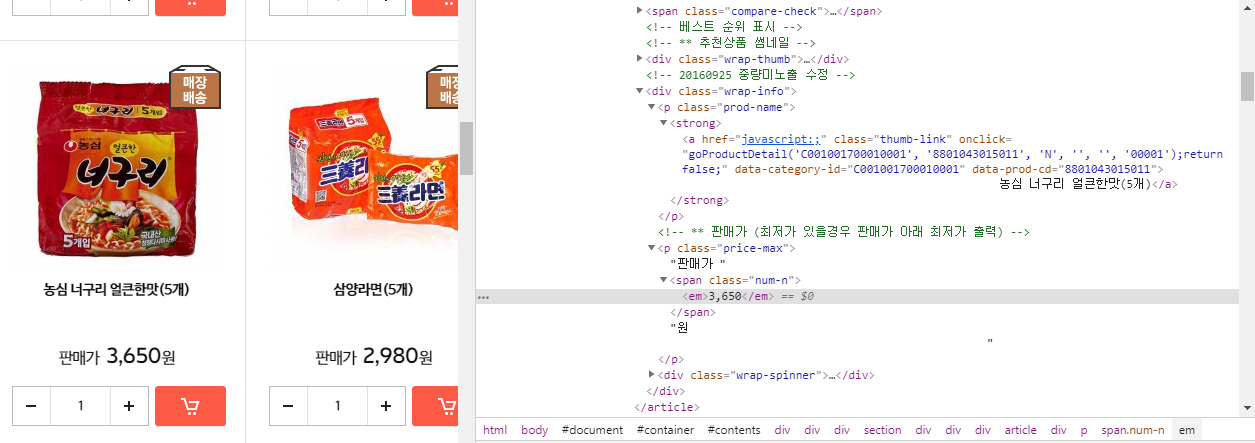

## 이마트

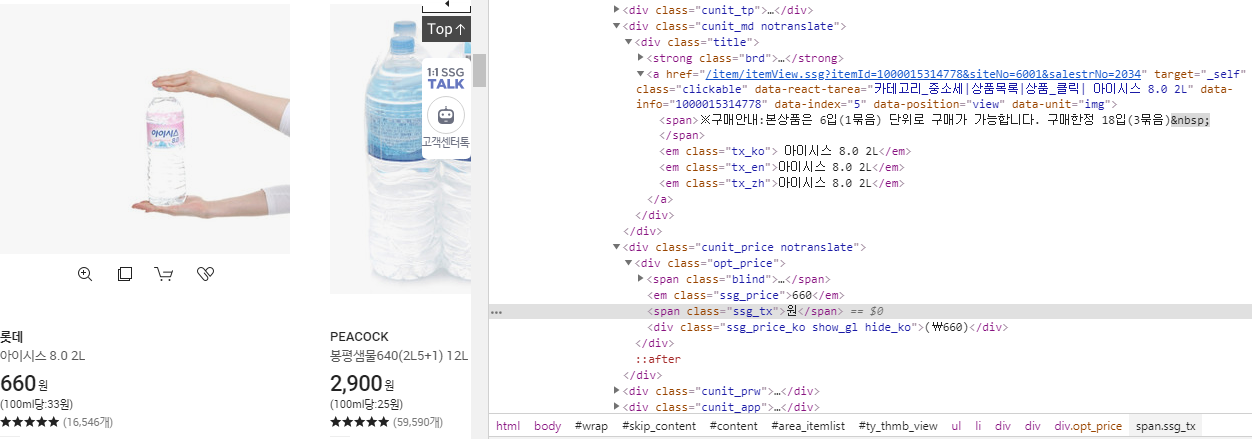

# 분석을 위한 데이터의 가공

- 웹 크롤링을 통해 얻어오고자 하는 정보: 마트별 상품의 이름, 가격
- 사용 모듈: requests(html 파일을 주고받는 요청을 보냄), BeautifulSoup(html 파일에서 정보를 추출)
- 웹 크롤링을 통한 html 태그 안 정보 읽어오기 → 원하는 태그를 포함한 태그를 리스트로 만든 후 리스트 안에서 다시 원하는 태그를 찾아 그 태그의 text를 추출해 리스트 인 리스트로 정리한다.

## 필요한 데이터를 웹크롤링을 통해 가져오기 

## 홈플러스
각각 따로 우유, 주스 이렇게 돌리면 오류가 안뜨는데 한번에 돌리면 오류가 뜹니다.

In [ ]:
import requests # 웹 페이지의 HTML을 가져오는 모듈
from bs4 import BeautifulSoup # HTML을 파싱하는 모듈

homeplus_dic = {'comm' : 'category.list' , 'cid' : ''} 

# 우유

# 소분류별 상품 코드
milk_code = {'white_milk' : '60201', 'lowfat_milk' : '60202', 'premium_milk' : '60203', 'sterilized_milk' : '60204', 
             'banana_milk' : '60205', 'strawberry_milk' : '60206', 'chocolate_milk' : '60207', 'coffee_milk' : '60208',
            'grain_milk' : '60209', 'soy_milk' : '60412', 'sterilized_straw_and_choco_milk' : '60211', 'baby_milk' : '60233',
            'soy_milk_kid' : '60413'}

H_data_milk = [] # 데이터를 저장할 리스트 생성

for milk, code in milk_code.items(): # 딕셔너리 반복문 돌리기(소분류별로 상품 따오기 위해서)
    homeplus_dic['cid'] = code
    
    # 웹 페이지를 가져온 뒤 BeatfulSoup 객체로 만듦
    response = requests.get('http://www.homeplus.co.kr/app.exhibition.category.Category.ghs', homeplus_dic) 

    soup = BeautifulSoup(response.content, 'html.parser')
    
    # 원하는 정보를 가져오기 위한 태그 찾기
    div = soup.find('div', {'id' : 'ui-sort1' })                              # <div id='ui-sort1'>을 찾음
    for ul in div.find_all('ul'):                                             # 모든 <ul> 태그를 찾아서 반복
        lis = list(ul.find_all('li'))                                         # 모든 <li> 태그를 찾아서 리스트로 만듦
        for li in lis:                                                        # <li> 태그 리스트 반복 (각 상품정보 가져오기)
            if type(li.find('a', {'class' : 'name'})) == type(None):          # 태그를 찾지 못하고 오류가 일어날 경우 넘어가기
                continue
            name = li.find('a', {'class' : 'name'}).text                      # <a class='name'> 태그에서 상품명을 가져옴
            name = name.replace('_', ' ')                                     # 마트별로 지정된 이름이 다르기 때문에 나중에 같은 상품을 찾기 편하게 하기 위함
            name = name.lstrip()                           
            price = li.find('strong', {'class' : 'buy'}).text                 # <strong class='buy'> 태그에서 상품 가격을 가져옴
            price = price.replace(',', '')
            if H_data_milk.count([name, price]) == 0:                         # 소분류가 겹쳐 중복되어 들어갈 수 있는 물품을 제외
                H_data_milk.append([name, price])
                
H_data_milk.sort()

# 탄산/이온/비타민음료

beverage_code = {'coke_and_cider' : '60392', 'fruit_flavor' : '60393', 'sparkling_water' : '60394', 'ion_beverage' : '60395', 
                 'energy_drink' : '60396', 'hangover_drink' : '60397', 'non_alcohol_beer' : '60398', 'drink_for_kid' : '60414'}

H_data_beverage = []

for beverage, code in beverage_code.items():
    homeplus_dic['cid'] = code
    
    response = requests.get('http://www.homeplus.co.kr/app.exhibition.category.Category.ghs', homeplus_dic)

    soup = BeautifulSoup(response.content, 'html.parser')

    div = soup.find('div', {'id' : 'ui-sort1' })
    for ul in div.find_all('ul'):
        lis = list(ul.find_all('li'))
        for li in lis:
            if type(li.find('a', {'class' : 'name'})) == type(None):
                continue
            name = li.find('a', {'class' : 'name'}).text
            name = name.replace('_', ' ')
            name = name.lstrip()
            price = li.find('strong', {'class' : 'buy'}).text 
            price = price.replace(',', '')
            if H_data_beverage.count([name, price]) == 0:
                H_data_beverage.append([name, price])
                
H_data_beverage.sort()

# 주스

juice_code = {'orange' : '60399', 'grape_apple_maesil_others' : '60401', 'mango_grapefruit_tropicalfruit' : '60402', 
             'vegetable' : '60403', 'fruit_juice' : '60226', 'vegetable_juice' : '60227'}

H_data_juice = []

for juice, code in juice_code.items():
    homeplus_dic['cid'] = code
    
    response = requests.get('http://www.homeplus.co.kr/app.exhibition.category.Category.ghs', homeplus_dic)

    soup = BeautifulSoup(response.content, 'html.parser')

    div = soup.find('div', {'id' : 'ui-sort1' })
    for ul in div.find_all('ul'):
        lis = list(ul.find_all('li'))
        for li in lis:
            if type(li.find('a', {'class' : 'name'})) == type(None):
                continue
            name = li.find('a', {'class' : 'name'}).text
            name = name.replace('_', ' ')
            name = name.lstrip()
            price = li.find('strong', {'class' : 'buy'}).text
            price = price.replace(',', '')
            if H_data_juice.count([name, price]) == 0:
                H_data_juice.append([name, price]) 
                
H_data_juice.sort()
            
# 커피/차/전통음료

tea_code = {'coffee' : '60406', 'greentea_blacktea' : '60407', 'coffee_drink' : '60228', 'corn_barley_hut' : '60408', 'tradition' : '60409',
            'oriental' : '60410' }

H_data_tea = []

for tea, code in tea_code.items():
    homeplus_dic['cid'] = code
    
    response = requests.get('http://www.homeplus.co.kr/app.exhibition.category.Category.ghs', homeplus_dic)

    soup = BeautifulSoup(response.content, 'html.parser')

    div = soup.find('div', {'id' : 'ui-sort1' })
    for ul in div.find_all('ul'):
        lis = list(ul.find_all('li'))
        for li in lis:
            if type(li.find('a', {'class' : 'name'})) == type(None):
                continue
            name = li.find('a', {'class' : 'name'}).text
            name = name.replace('_', ' ')
            name = name.lstrip()
            price = li.find('strong', {'class' : 'buy'}).text
            price = price.replace(',', '')
            if H_data_tea.count([name, price]) == 0:
                H_data_tea.append([name, price]) 
                
H_data_tea.sort()
            
# 생수/탄산수

water_code = {'water_under_500ml' : '60387', 'water_over_2L' : '60388', 'sparkling_water' : '60389', 'imported_water' : '60390'} 

H_data_water = []

for water, code in water_code.items():
    homeplus_dic['cid'] = code
    
    response = requests.get('http://www.homeplus.co.kr/app.exhibition.category.Category.ghs', homeplus_dic)

    soup = BeautifulSoup(response.content, 'html.parser')

    div = soup.find('div', {'id' : 'ui-sort1' })
    for ul in div.find_all('ul'):
        lis = list(ul.find_all('li'))
        for li in lis:
            if type(li.find('a', {'class' : 'name'})) == type(None):
                continue
            name = li.find('a', {'class' : 'name'}).text
            name = name.replace('_', ' ')
            name = name.lstrip()
            price = li.find('strong', {'class' : 'buy'}).text
            price = price.replace(',', '')
            if H_data_water.count([name, price]) == 0:
                H_data_water.append([name, price])   
                
H_data_water.sort()
            
# 라면 

ramen_code = {'normal' : '60338', 'jjajang_bibim' : '60339', 'udon' : '60340', 'cup' : '60341'}

H_data_ramen = []

for ramen, code in ramen_code.items():
    homeplus_dic['cid'] = code
    
    response = requests.get('http://www.homeplus.co.kr/app.exhibition.category.Category.ghs', homeplus_dic)

    soup = BeautifulSoup(response.content, 'html.parser')

    div = soup.find('div', {'id' : 'ui-sort1' })
    for ul in div.find_all('ul'):
        lis = list(ul.find_all('li'))
        for li in lis:
            if type(li.find('a', {'class' : 'name'})) == type(None):
                continue
            name = li.find('a', {'class' : 'name'}).text
            name = name.replace('_', ' ')
            name = name.lstrip()
            price = li.find('strong', {'class' : 'buy'}).text
            price = price.replace(',', '')
            if H_data_ramen.count([name, price]) == 0:
                H_data_ramen.append([name, price])  
                
H_data_ramen.sort()

## 롯데마트

In [ ]:
import requests # 웹 페이지의 HTML을 가져오는 모듈
from bs4 import BeautifulSoup # HTML을 파싱하는 모듈

lottemart_dic = {'CategoryID' : ''}

# 우유

milk_code = {'white_milk' : 'C001001600090001', 'lowfat_milk' : 'C001001600090002', 'sterilized_milk' : 'C001001600090007', 
             'flavored' : 'C001001600090003', 'soy_milk' : 'C001001700130019', 'functional_soy_milk' : 'C001001700130020',
             'soy_milk_kid' : 'C001001700130021'}

L_data_milk = []  # 데이터를 저장할 리스트 생성

for milk, code in milk_code.items():     # 딕셔너리 반복문 돌리기(소분류별로 상품 따오기 위해서)
    lottemart_dic['CategoryID'] = code
    
    # 웹 페이지를 가져온 뒤 BeatfulSoup 객체로 만듦
    response = requests.get('http://www.lottemart.com/category/categoryList.do', lottemart_dic)
    
    soup = BeautifulSoup(response.content, 'html.parser')

    # 원하는 정보를 가져오기 위한 태그 찾기
    div = soup.find('div', {'class' : 'wrap-prod-list-3depth' })                         # <div class='wrap-prod-list-3depth'를 찾음>
    for div_list in div.find_all('div', {'class' : 'prod-list clear-after'}):            # 모든 <div class='prod-list clear-after'> 태그를 찾아서 반복
        products = list(div_list.find_all('article', {'class' : 'product-article'}))     # 모든 <article class='product-article'> 태그를 찾아서 리스트로 만듦
        for product in products:                                                         # <article class='product-article'> 태그 리스트 반복 (각 상품정보 가져오기)
            if type(product.find('strong')) == type(None):                               # 태그를 찾지 못하고 오류가 일어날 경우 넘어가기
                continue
            else: 
                name = product.find('strong').text                                       # <strong> 태그에서 상품명을 가져옴
            name = name.replace('\n',"")                                                 # 정보를 가져오면서 딸려오는 불필요한 요소 제거                                        
            name = name.replace('\r',"")
            name = name.replace('\t',"")
            price = product.find('em').text                                              # <em> 태그에서 상품 가격을 가져옴
            price = price.replace(',', '')
            if L_data_milk.count([name, price]) == 0:                                    # 소분류가 겹쳐 중복되어 들어갈 수 있는 물품을 제외
                L_data_milk.append([name, price])        

# 생수/탄산수

water_code = {'water' : 'C001001700130001', 'imported_water' : 'C001001700130002', 'sparkling_water' : 'C001001700130025'}

L_data_water = []

for water, code in water_code.items():
    lottemart_dic['CategoryID'] = code
    
    response = requests.get('http://www.lottemart.com/category/categoryList.do', lottemart_dic)
    
    soup = BeautifulSoup(response.content, 'html.parser')

    div = soup.find('div', {'class' : 'wrap-prod-list-3depth' })
    for div_list in div.find_all('div', {'class' : 'prod-list clear-after'}):
        products = list(div_list.find_all('article', {'class' : 'product-article'}))
        for product in products:
            if type(product.find('strong')) == type(None):
                continue
            else: 
                name = product.find('strong').text
            name = name.replace('\n',"")
            name = name.replace('\r',"")
            name = name.replace('\t',"")
            price = product.find('em').text
            price = price.replace(',', '')
            if L_data_water.count([name, price]) == 0:
                L_data_water.append([name, price])
            
# 주스

juice_code = {'orange_juice' : 'C001001700130010', 'grape_juice' : 'C001001700130011', 'other_fruit_juice' : 'C001001700130012',
              'juice_drink' : 'C001001700130016'}

L_data_juice = []

for juice, code in juice_code.items():
    lottemart_dic['CategoryID'] = code
    
    response = requests.get('http://www.lottemart.com/category/categoryList.do', lottemart_dic)
    
    soup = BeautifulSoup(response.content, 'html.parser')

    div = soup.find('div', {'class' : 'wrap-prod-list-3depth' })
    for div_list in div.find_all('div', {'class' : 'prod-list clear-after'}):
        products = list(div_list.find_all('article', {'class' : 'product-article'}))
        for product in products:
            if type(product.find('strong')) == type(None):
                continue
            else: 
                name = product.find('strong').text
            name = name.replace('\n',"")
            name = name.replace('\r',"")
            name = name.replace('\t',"")
            price = product.find('em').text
            price = price.replace(',', '')
            if L_data_juice.count([name, price]) == 0:
                L_data_juice.append([name, price])
            
# 탄산/이온/비타민음료

beverage_code = {'can_softdrink' : 'C001001700130003', 'pet_softdrink' : 'C001001700130004', 'kid_drink' : 'C001001700130013',
                 'vitamin_ion_energy_drink' : 'C001001700130005', 'hangover_drink' : 'C001001700130023', 
                 'health_drink' : 'C001001700130024', 'non_alcohol_beer_wine' : 'C001001700130008'}

L_data_beverage = []

for beverage, code in beverage_code.items():
    lottemart_dic['CategoryID'] = code
    
    response = requests.get('http://www.lottemart.com/category/categoryList.do', lottemart_dic)
    
    soup = BeautifulSoup(response.content, 'html.parser')

    div = soup.find('div', {'class' : 'wrap-prod-list-3depth' })
    for div_list in div.find_all('div', {'class' : 'prod-list clear-after'}):
        products = list(div_list.find_all('article', {'class' : 'product-article'}))
        for product in products:
            if type(product.find('strong')) == type(None):
                continue
            else: 
                name = product.find('strong').text
            name = name.replace('\n',"")
            name = name.replace('\r',"")
            name = name.replace('\t',"")
            price = product.find('em').text
            price = price.replace(',', '')
            if L_data_beverage.count([name, price]) == 0:
                L_data_beverage.append([name, price])
            
# 커피/차/전통음료

tea_code = {'coffee_drink' : 'C001001700130006', 'tea_drink' : 'C001001700130007','traditional_drink' : 'C001001700130014'}

L_data_tea = []

for tea, code in tea_code.items():
    lottemart_dic['CategoryID'] = code
    
    response = requests.get('http://www.lottemart.com/category/categoryList.do', lottemart_dic)
    
    soup = BeautifulSoup(response.content, 'html.parser')

    div = soup.find('div', {'class' : 'wrap-prod-list-3depth' })
    for div_list in div.find_all('div', {'class' : 'prod-list clear-after'}):
        products = list(div_list.find_all('article', {'class' : 'product-article'}))
        for product in products:
            if type(product.find('strong')) == type(None):
                continue
            else: 
                name = product.find('strong').text
            name = name.replace('\n',"")
            name = name.replace('\r',"")
            name = name.replace('\t',"")
            price = product.find('em').text
            price = price.replace(',', '')
            if L_data_tea.count([name, price]) == 0:
                L_data_tea.append([name, price])

# 라면

ramen_code = {'bag' : 'C001001700010001', 'box_bag' : 'C001001700010002', 'cup' : 'C001001700010003', 'box_bag' : 'C001001700010004'}

L_data_ramen = []

for ramen, code in ramen_code.items():
    lottemart_dic['CategoryID'] = code
    
    response = requests.get('http://www.lottemart.com/category/categoryList.do', lottemart_dic)
    
    soup = BeautifulSoup(response.content, 'html.parser')

    div = soup.find('div', {'class' : 'wrap-prod-list-3depth' })
    for div_list in div.find_all('div', {'class' : 'prod-list clear-after'}):
        products = list(div_list.find_all('article', {'class' : 'product-article'}))
        for product in products:
            if type(product.find('strong')) == type(None):
                continue
            else: 
                name = product.find('strong').text
            name = name.replace('\n',"")
            name = name.replace('\r',"")
            name = name.replace('\t',"")
            name = name.replace('●', "")
            price = product.find('em').text
            price = price.replace(',', '')
            if L_data_ramen.count([name, price]) == 0:
                L_data_ramen.append([name, price])

## 이마트

In [ ]:
import requests, time
from bs4 import BeautifulSoup

# 우유/냉장음료

response = requests.get('http://emart.ssg.com/category/listCategoryItem.ssg?dispCtgId=6000025612&page=1')
soup = BeautifulSoup(response.content, 'html.parser')
sum = 0
page_num = 1
total = soup.find('em', {'id' : 'area_item_total_count'}).text.strip() # 페이지를 넘기지 않고 다음 페이지에 있는 물건들의 정보를 따기 위해 전체 품목개수를 따옴
total = int(total.replace(',',''))  # 따온 것이 문자열이기 때문에 작은따옴표를 떼고 정수형으로 바꿔줌
E_data_milk = []
while True:
    response = requests.get('http://emart.ssg.com/category/listCategoryItem.ssg?dispCtgId=6000025612&page={}'.format(page_num))
    soup = BeautifulSoup(response.content, 'html.parser')
    table = soup.find('div', {'id' : 'ty_thmb_view'})
    if sum >= total:
        break   # 물건 개수보다 sum 이 많아지면 반복문을 빠져나옴(sum은 0으로 시작해서 for문이 돌 동안 1씩 더해짐)
    else:
        for emart in table.find_all('li', {'class' : 'cunit_t290'}):  # 이마트의 상품 개별 태그를 따옴
            price = int(emart.find('em', {'class' : 'ssg_price'}).text.replace(",",''))   # 개별 태그에서 가격을 따오고 가격을 비교하기위해 콤마를 제거
            emart_list = list(emart.find_all('a'))    #개별 태그 안에 있는 것 중 상품명이 있는 a태그를 따와 리스트로 만듦
            for goods in emart_list:
                name_tag = goods.find('em', {'class' : 'tx_ko'})   # 태그 안에도 상품명이 3개의 태그에 중복되게 있으므로 태그 한개만 따옴
                if type(name_tag) == type(None):  # Nonetype error가 날 경우 반복문을 다시 실행
                    continue
                else:
                    name = name_tag.text  #이름 태그를 따와서 텍스트 형식으로 바꿔줌
                    sum += 1
            E_data_milk.append([name,price])
    time.sleep(10)   #페이지를 넘기기 전 페이지 로딩 시간을 기달려주기 위해 10초를 기다림
    page_num += 1   #1페이지 이후 다음 페이지들을 받아오기 위해 page_num에 1을 더해줌

# 국산생수

response = requests.get('http://emart.ssg.com/category/listCategoryItem.ssg?dispCtgId=6000023670&page=1')
soup = BeautifulSoup(response.content, 'html.parser')
sum = 0
page_num = 1
total = int(soup.find('em', {'id' : 'area_item_total_count'}).text.strip())
E_data_water_1 = [] 
while True:
    response = requests.get('http://emart.ssg.com/category/listCategoryItem.ssg?dispCtgId=6000023670&page={}'.format(page_num))
    soup = BeautifulSoup(response.content, 'html.parser')
    table = soup.find('div', {'id' : 'ty_thmb_view'})
    if sum >= total:
        break
    else:
        for emart in table.find_all('li', {'class' : 'cunit_t290'}):
            price = int(emart.find('em', {'class' : 'ssg_price'}).text.replace(",",''))
            emart_list = list(emart.find_all('a'))
            for goods in emart_list:
                name_tag = goods.find('em', {'class' : 'tx_ko'})
                if type(name_tag) == type(None): #
                    continue
                else:
                    name = name_tag.text
                    sum += 1
            E_data_water_1.append([name,price])
    time.sleep(10)
    page_num += 1
    
# 수입생수

response = requests.get('http://emart.ssg.com/category/listCategoryItem.ssg?dispCtgId=6000023671&page=1')
soup = BeautifulSoup(response.content, 'html.parser')
sum = 0
page_num = 1
total = int(soup.find('em', {'id' : 'area_item_total_count'}).text.strip())
E_data_water_2 = []
while True:
    response = requests.get('http://emart.ssg.com/category/listCategoryItem.ssg?dispCtgId=6000023671&page={}'.format(page_num))
    soup = BeautifulSoup(response.content, 'html.parser')
    table = soup.find('div', {'id' : 'ty_thmb_view'})
    if sum >= total:
        break
    else:
        for emart in table.find_all('li', {'class' : 'cunit_t290'}):
            price = int(emart.find('em', {'class' : 'ssg_price'}).text.replace(",",''))
            emart_list = list(emart.find_all('a'))
            for goods in emart_list:
                name_tag = goods.find('em', {'class' : 'tx_ko'})
                if type(name_tag) == type(None): #
                    continue
                else:
                    name = name_tag.text
                    sum += 1
            E_data_water_2.append([name,price])
    time.sleep(10)
    page_num += 1
    

# 탄산수

response = requests.get('http://emart.ssg.com/category/listCategoryItem.ssg?dispCtgId=6000023672&page=1')
soup = BeautifulSoup(response.content, 'html.parser')
sum = 0
page_num = 1
total = int(soup.find('em', {'id' : 'area_item_total_count'}).text.strip())
E_data_sparkling_water = []
while True:
    response = requests.get('http://emart.ssg.com/category/listCategoryItem.ssg?dispCtgId=6000023672&page={}'.format(page_num))
    soup = BeautifulSoup(response.content, 'html.parser')
    table = soup.find('div', {'id' : 'ty_thmb_view'})
    if sum >= total:
        break
    else:
        for emart in table.find_all('li', {'class' : 'cunit_t290'}):
            price = int(emart.find('em', {'class' : 'ssg_price'}).text.replace(",",''))
            emart_list = list(emart.find_all('a'))
            for goods in emart_list:
                name_tag = goods.find('em', {'class' : 'tx_ko'})
                if type(name_tag) == type(None): #
                    continue
                else:
                    name = name_tag.text
                    sum += 1
            E_data_sparkling_water.append([name,price])
    time.sleep(10)
    page_num += 1

# 생수/탄산수

E_data_water = E_data_water_1 + E_data_water_2 + E_data_sparkling_water   # 하나의 리스트로 묶기

# 콜라/사이다/환타/스포츠음료

response = requests.get('http://emart.ssg.com/category/listCategoryItem.ssg?dispCtgId=6000023674&page=1')
soup = BeautifulSoup(response.content, 'html.parser')
sum = 0
page_num = 1
total = int(soup.find('em', {'id' : 'area_item_total_count'}).text.strip())
E_data_beverage = [] 
while True:
    response = requests.get('http://emart.ssg.com/category/listCategoryItem.ssg?dispCtgId=6000023674&page={}'.format(page_num))
    soup = BeautifulSoup(response.content, 'html.parser')
    table = soup.find('div', {'id' : 'ty_thmb_view'})
    if sum >= total:
        break
    else:
        for emart in table.find_all('li', {'class' : 'cunit_t290'}):
            price = int(emart.find('em', {'class' : 'ssg_price'}).text.replace(",",''))
            emart_list = list(emart.find_all('a'))
            for goods in emart_list:
                name_tag = goods.find('em', {'class' : 'tx_ko'})
                if type(name_tag) == type(None): #
                    continue
                else:
                    name = name_tag.text
                    sum += 1
            E_data_beverage.append([name,price])
    time.sleep(10)
    page_num += 1
    
# 과일/야채음료

response = requests.get('http://emart.ssg.com/category/listCategoryItem.ssg?dispCtgId=6000023673&page=1')
soup = BeautifulSoup(response.content, 'html.parser')
sum = 0
page_num = 1
total = int(soup.find('em', {'id' : 'area_item_total_count'}).text.strip())
E_data_juice = []
while True:
    response = requests.get('http://emart.ssg.com/category/listCategoryItem.ssg?dispCtgId=6000023673&page={}'.format(page_num))
    soup = BeautifulSoup(response.content, 'html.parser')
    table = soup.find('div', {'id' : 'ty_thmb_view'})
    if sum >= total:
        break
    else:
        for emart in table.find_all('li', {'class' : 'cunit_t290'}):
            price = int(emart.find('em', {'class' : 'ssg_price'}).text.replace(",",''))
            emart_list = list(emart.find_all('a'))
            for goods in emart_list:
                name_tag = goods.find('em', {'class' : 'tx_ko'})
                if type(name_tag) == type(None): #
                    continue
                else:
                    name = name_tag.text
                    sum += 1
            E_data_juice.append([name,price])
    time.sleep(10)
    page_num += 1

# 주스

E_data_juice = E_data_juice + E_data_milk

#스타벅스/커피/티/건강음료

response = requests.get('http://emart.ssg.com/category/listCategoryItem.ssg?dispCtgId=6000023675&page=1')
soup = BeautifulSoup(response.content, 'html.parser')
sum = 0
page_num = 1
total = int(soup.find('em', {'id' : 'area_item_total_count'}).text.strip())
E_data_tea = []
while True:
    response = requests.get('http://emart.ssg.com/category/listCategoryItem.ssg?dispCtgId=6000023675&page={}'.format(page_num))
    soup = BeautifulSoup(response.content, 'html.parser')
    table = soup.find('div', {'id' : 'ty_thmb_view'})
    if sum >= total:
        break
    else:
        for emart in table.find_all('li', {'class' : 'cunit_t290'}):
            price = int(emart.find('em', {'class' : 'ssg_price'}).text.replace(",",''))
            emart_list = list(emart.find_all('a'))
            for goods in emart_list:
                name_tag = goods.find('em', {'class' : 'tx_ko'})
                if type(name_tag) == type(None): #
                    continue
                else:
                    name = name_tag.text
                    sum += 1
            E_data_tea.append([name,price])
    time.sleep(10)
    page_num += 1

# 커피/차/전통음료

E_data_tea = E_data_tea + E_data_milk

# 탄산/이온/비타민음료

E_data_beverage = E_data_beverage + E_data_tea   

#라면

from bs4 import BeautifulSoup

response = requests.get('http://www.ssg.com/disp/category.ssg?ctgId=6000052306&dispCtgSubIds=6000052316%7C6000052317&page=1')
soup = BeautifulSoup(response.content, 'html.parser')

sum = 0
page_num = 1
total = soup.find('em', {'id' : 'area_item_total_count'}).text.strip()
total = int(total.replace(',',''))
E_data_ramen = []
while True:
    response = requests.get('http://www.ssg.com/disp/category.ssg?ctgId=6000052306&dispCtgSubIds=6000052316%7C6000052317&page={}'.format(page_num))
    soup = BeautifulSoup(response.content, 'html.parser')
    table = soup.find('div', {'id' : 'ty_thmb_view'})
    if sum >= total:
        break
    else:
        for emart in table.find_all('li', {'class' : 'cunit_t290'}):
            price = int(emart.find('em', {'class' : 'ssg_price'}).text.replace(",",''))
            emart_list = list(emart.find_all('a'))
            for goods in emart_list:
                name_tag = goods.find('em', {'class' : 'tx_ko'})
                if type(name_tag) == type(None): #
                    continue
                else:
                    name = name_tag.text
                    sum += 1
            E_data_ramen.append([name,price])
    time.sleep(10)
    page_num += 1

## 마트별 가격을 비교하기 위해 같은 물품끼리 묶기_상품명

In [ ]:
import re                                # 정규 표현식을 지원하는 모듈
from difflib import SequenceMatcher      # 시퀀스 쌍을 비교하는 클래스

# 유사도 측정 함수(같은 상품을 찾기 위해)

def similar(name_1, name_2): 
    return SequenceMatcher(None, name_1, name_2).ratio()

# str에서 한글만 뽑아오는 함수

def korean_filter(name):
    korean = re.compile('[^ ㄱ-ㅣ가-힣]+')                 # 한글을 제외한 모든 글자
    result = korean.sub('', name)                          # 한글 제외 모든 부분 제거
    return result

# 이름(상품명)이 유사한 것끼리 묶는 함수

def find_same_product_name(standard_data_list, object_data_list):
    
    list_sim = []                                                               # 데이터를 저장하기 위한 리스트 생성
    
    for i in range(len(standard_data_list)):                                    # 기준 데이터 가져오기
        korean_H_data = korean_filter(standard_data_list[i][0])                 
        for j in range(len(object_data_list)):                                  # 비교 데이터 가져오기
            korean_L_data = korean_filter(object_data_list[j][0])
            if similar(korean_H_data, korean_L_data) > 0.8:                     # 유사도가 80%가 넘을 시 리스트에 추가
                list_sim.append([standard_data_list[i], object_data_list[j]])
    return list_sim

In [ ]:
# 홈플러스와 롯데마트 같은 상품 묶기(상품명)

# 우유
list_sim_milk_HL = find_same_product_name(H_data_milk, L_data_milk)
# 탄산/이온/비타민음료
list_sim_beverage_HL = find_same_product_name(H_data_beverage, L_data_beverage)
# 주스
list_sim_juice_HL = find_same_product_name(H_data_juice, L_data_juice)
# 커피/차/전통음료
list_sim_tea_HL = find_same_product_name(H_data_tea, L_data_tea)
# 생수/탄산수
list_sim_water_HL = find_same_product_name(H_data_water, L_data_water)
# 라면
list_sim_ramen_HL = find_same_product_name(H_data_ramen, L_data_ramen)

# 홈플러스와 이마트 같은 상품 묶기(상품명)

# 우유
list_sim_milk_HE = find_same_product_name(H_data_milk, E_data_milk)
# 탄산/이온/비타민음료
list_sim_beverage_HE = find_same_product_name(H_data_beverage, E_data_beverage)
# 주스
list_sim_juice_HE = find_same_product_name(H_data_juice, E_data_juice)
# 커피/차/전통음료
list_sim_tea_HE = find_same_product_name(H_data_tea, E_data_tea)
# 생수/탄산수
list_sim_water_HE = find_same_product_name(H_data_water, E_data_water)
# 라면
list_sim_ramen_HE = find_same_product_name(H_data_ramen, E_data_ramen)

## 마트별 가격을 비교하기 위해 같은 물품끼리 묶기_용량(상품명으로 묶은 후)

In [ ]:
import re

# 숫자(상품 용량)가 같은 것끼리 묶는 함수

def find_same_product_amount(list_sim):
    #
    list_same_item = []         # 데이터를 저장할 리스트 생성          

    for i in range(len(list_sim)):
        output = []
        lines = list_sim[i][0][0]
        line = lines.split()                       # 문자열 나누기
        for num in line:                           # 경우에 따라 line에 다른 정보를 저장
            if num.find('*') != -1:                
                if len(num.split('*')) == 2:       
                    a, b = num.split('*')          
                    line.remove(num)
                    line.append(a)
                    line.append(b)
                elif len(num.split('*')) == 3:
                    a, b, c = num.split('*')
                    line.remove(num)
                    line.append(a)
                    line.append(b)
                    line.append(c)
        for word in line:                              # line 안의 요소들에 대하여 반복
            match = re.search(r'\d+.?\d*', word)       # word에서 숫자만 찾음
            if match:                                  # 숫자가 있을 경우 output에 저장
                output.append(match.group())
        for j in range(len(output)):                   
            output[j] = output[j].replace('(','')      # 정규 표현식 사용에서 생길 수 있는 오류 발생 요소들 제거
            output[j] = output[j].replace(')','')
            output[j] = output[j].replace('[','')
            output[j] = output[j].replace(']','')
            output[j] = output[j].replace('/','')
            output[j] = output[j].replace('+','')
        if len(output) == 1:
            m = re.compile('.+'+output[0]+'.+', re.I)
            if m.match(list_sim[i][1][0]):
                    list_same_item.append([list_sim[i][0], list_sim[i][1]])
        elif len(output) == 2:
            m = re.compile('.+'+output[0]+'.+', re.I)
            n =  re.compile('.+'+output[1]+'.+', re.I)
            if m.match(list_sim[i][1][0]):
                    if n.match(list_sim[i][1][0]):
                        list_same_item.append([list_sim[i][0], list_sim[i][1]])
        elif len(output) == 3:
            m = re.compile('.+'+output[0]+'.+', re.I)
            n =  re.compile('.+'+output[1]+'.+', re.I)
            o = re.compile('.+'+output[2]+'.+', re.I)
            if m.match(list_sim[i][1][0]):
                    if n.match(list_sim[i][1][0]):
                        if o.match(list_sim[i][1][0]):
                            list_same_item.append([list_sim[i][0], list_sim[i][1]])
        else:
            continue
    return list_same_item

In [ ]:
# 홈플러스와 롯데마트 같은 상품 묶기(상품 용량)

# 우유
marts_milk_data_HL = find_same_product_amount(list_sim_milk_HL)
# 탄산/이온/비타민음료
marts_beverage_data_HL = find_same_product_amount(list_sim_beverage_HL)
# 주스
marts_juice_data_HL = find_same_product_amount(list_sim_juice_HL)
# 커피/차/전통음료
marts_tea_data_HL = find_same_product_amount(list_sim_tea_HL)
# 생수/탄산수
marts_water_data_HL = find_same_product_amount(list_sim_water_HL)
# 라면
marts_ramen_data_HL = find_same_product_amount(list_sim_ramen_HL)

# 홈플러스와 이마트 같은 상품 묶기(상품 용량)

# 우유
marts_milk_data_HE = find_same_product_amount(list_sim_milk_HE)
# 탄산/이온/비타민음료
marts_beverage_data_HE = find_same_product_amount(list_sim_beverage_HE)
# 주스
marts_juice_data_HE = find_same_product_amount(list_sim_juice_HE)
# 커피/차/전통음료
marts_tea_data_HE = find_same_product_amount(list_sim_tea_HE)
# 생수/탄산수
marts_water_data_HE = find_same_product_amount(list_sim_water_HE)
# 라면
marts_ramen_data_HE = find_same_product_amount(list_sim_ramen_HE)

## 마트별 가격을 비교하기 위해 같은 물품끼리 묶기_마무리(홈플러스, 롯데마트, 이마트 한번에)
홈플러스와 롯데마트, 홈플러스와 이마트 이렇게 같은 상품을 찾았기 때문에 세 마트 다 같이 비교하기 위해 하나로 묶는다.
(해당 상품이 세 마트에 모두 있는 경우만 비교)

In [ ]:
# 두 리스트 내의 첫번째 요소가 같은 경우 묶는 함수

def input_element(list_1, list_2):
    
    list_same = []
    
    for i in range(len(list_1)):
        for j in range(len(list_2)):
            if list_1[i][0] == list_2[j][0]:
                list_same.append([list_1[i][0], list_1[i][1], list_2[j][1]])
    return list_same

In [ ]:
# 우유
all_mart_data_milk = input_element(marts_milk_data_HL, marts_milk_data_HE)
# 탄산/이온/비타민음료
all_mart_data_beverage = input_element(marts_beverage_data_HL, marts_beverage_data_HE)
# 주스
all_mart_data_juice = input_element(marts_juice_data_HL, marts_juice_data_HE)
# 커피/차/전통음료
all_mart_data_tea = input_element(marts_tea_data_HL, marts_tea_data_HE)
# 생수/탄산수
all_mart_data_water = input_element(marts_water_data_HL, marts_water_data_HE)
# 라면
all_mart_data_ramen = input_element(marts_ramen_data_HL, marts_ramen_data_HE)

## 데이터를 정리하기 위해 csv 파일 만들기

In [ ]:
# 우유
with open('mart_milk.csv', 'w') as file:                                                                     # mart.csv 파일을 쓰기 모드로 열기
    file.write('homeplus_name, homeplus_price, lottemart_name, lottemart_price, emart_name, emart_price\n')  # column 이름 추가
    for i in all_mart_data_milk:                                                       
        file.write('{0},{1},{2},{3},{4},{5}\n'.format(i[0][0], i[0][1], i[1][0], i[1][1], i[2][0], i[2][1])) # 마트별 상품명과 가격 저장

# 탄산/이온/비타민음료
with open('mart_beverage.csv', 'w') as file:                                                 
    file.write('homeplus_name, homeplus_price, lottemart_name, lottemart_price, emart_name, emart_price\n')  
    for i in all_mart_data_beverage:                                                       
        file.write('{0},{1},{2},{3},{4},{5}\n'.format(i[0][0], i[0][1], i[1][0], i[1][1], i[2][0], i[2][1]))
        
# 주스
with open('mart_juice.csv', 'w') as file:                                                 
    file.write('homeplus_name, homeplus_price, lottemart_name, lottemart_price, emart_name, emart_price\n')  
    for i in all_mart_data_juice:                                                       
        file.write('{0},{1},{2},{3},{4},{5}\n'.format(i[0][0], i[0][1], i[1][0], i[1][1], i[2][0], i[2][1]))
        
# 커피/차/전통음료
with open('mart_tea.csv', 'w') as file:                                                 
    file.write('homeplus_name, homeplus_price, lottemart_name, lottemart_price, emart_name, emart_price\n')  
    for i in all_mart_data_tea:                                                       
        file.write('{0},{1},{2},{3},{4},{5}\n'.format(i[0][0], i[0][1], i[1][0], i[1][1], i[2][0], i[2][1]))

# 생수/탄산수
with open('mart_water.csv', 'w') as file:                                                 
    file.write('homeplus_name, homeplus_price, lottemart_name, lottemart_price, emart_name, emart_price\n')  
    for i in all_mart_data_water:                                                       
        file.write('{0},{1},{2},{3},{4},{5}\n'.format(i[0][0], i[0][1], i[1][0], i[1][1], i[2][0], i[2][1]))
        
# 라면
with open('mart_ramen.csv', 'w') as file:                                                 
    file.write('homeplus_name, homeplus_price, lottemart_name, lottemart_price, emart_name, emart_price\n')  
    for i in all_mart_data_ramen:                                                       
        file.write('{0},{1},{2},{3},{4},{5}\n'.format(i[0][0], i[0][1], i[1][0], i[1][1], i[2][0], i[2][1]))

# 분석 결과 도출

## 데이터프레임 만들기
csv 파일로 만들 때 데이터에 생긴 오류를 수작업으로 수정 후 '원래파일이름_revised.csv'로 저장

In [ ]:
import pandas as pd                # 데이터를 저장하고 처리하는 패키지
import matplotlib as mpl           # 그래프를 그리는 패키지
import matplotlib.pyplot as plt    # 그래프를 그리는 패키지

# csv 파일을 읽어서 DataFrame 객체로 만듦 

# 우유
data_frame_milk = pd.read_csv('mart_milk_revised.csv', index_col = 'homeplus_name', encoding = 'euc-kr')

# 탄산/이온/비타민음료
data_frame_beverage = pd.read_csv('mart_beverage_revised.csv', index_col = 'homeplus_name', encoding = 'euc-kr')

# 주스
data_frame_juice = pd.read_csv('mart_juice_revised.csv', index_col = 'homeplus_name', encoding = 'euc-kr')

# 커피/차/전통음료
data_frame_tea = pd.read_csv('mart_tea_revised.csv', index_col = 'homeplus_name', encoding = 'euc-kr')

# 생수/탄산수
data_frame_water = pd.read_csv('mart_water_revised.csv', index_col = 'homeplus_name', encoding = 'euc-kr')

# 라면
data_frame_ramen = pd.read_csv('mart_ramen_revised.csv', index_col = 'homeplus_name', encoding = 'euc-kr')

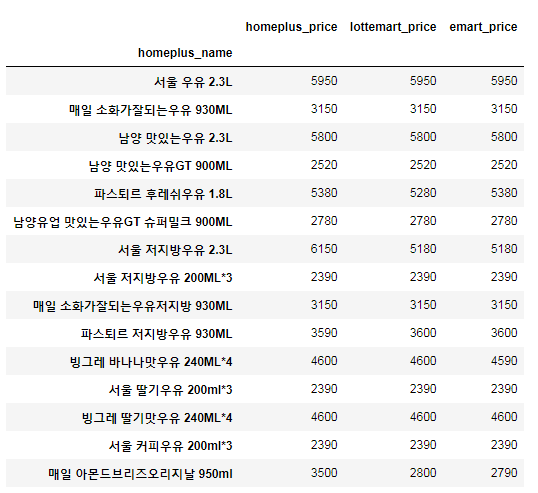

## 그래프 그리기
양이 너무 많아 예시로 몇개만 뽑아서 이미지로 올립니다.

In [ ]:
# Windows 한글 폰트 설정
font_name = mpl.font_manager.FontProperties(fname = 'C:\Windows\Fonts\malgun.ttf').get_name()
mpl.rc('font', family = font_name)

# 우유
milk_df = data_frame_milk.loc[['서울 우유 2.3L','매일 소화가잘되는우유 930ML','남양 맛있는우유 2.3L','남양 맛있는우유GT 900ML',
                               '파스퇴르 후레쉬우유 1.8L','남양유업 맛있는우유GT 슈퍼밀크 900ML','서울 저지방우유 2.3L',
                               '서울 저지방우유 200ML*3','매일 소화가잘되는우유저지방 930ML','파스퇴르 저지방우유 930ML',
                               '빙그레 바나나맛우유 240ML*4','서울 딸기우유 200ml*3','빙그레 딸기맛우유 240ML*4',
                               '서울 커피우유 200ml*3','매일 아몬드브리즈오리지날 950ml']]

# 차트 종류, 제목, 차트 크기, 범례, 폰트 크기 설정
milk_df = milk_df.astype(float)
ax = milk_df.plot(kind = 'bar', title = '마트별 우유의 가격', figsize = (12, 4), legend = True, fontsize = 12)
ax.set_xlabel('상품명', fontsize = 12)
ax.set_ylabel('상품 가격', fontsize = 12)
ax.legend(['홈플러스', '롯데마트', '이마트'], fontsize = 12)
plt.show()

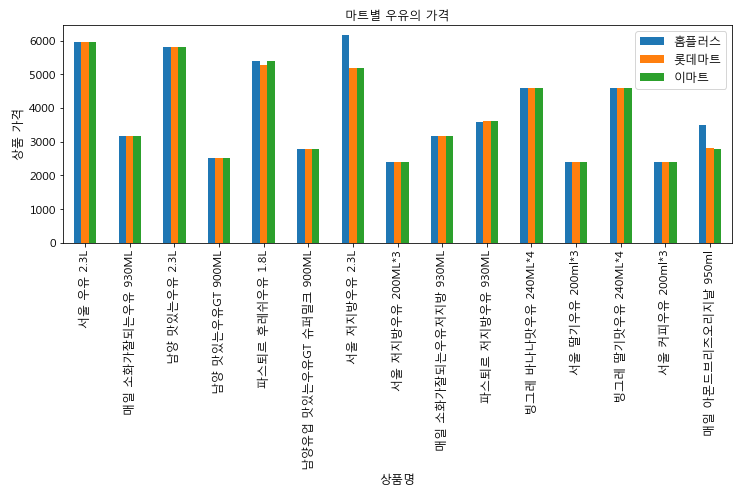

In [ ]:
# 탄산/이온/비타민음료
beverage_df = data_frame_beverage.loc[['팔도 뽀로로딸기맛 235ML','팔도 뽀로로밀크 235ML','팔도 뽀로로사과 235ML','CJ 헛개컨디션 100ML*10',
                                       '헛개 컨디션 100ml*2','광동 비타500 100ML*20','농심 카프리썬오렌지망고 200ML*10',
                                       '롯데칠성 핑크퐁상어가족오렌지망고 235ML','롯데칠성 핑크퐁상어가족포도사과 235ML',
                                       '몬스터 에너지 355ml x 24CAN','코카콜라 몬스터에너지울트라 355ML','코카콜라 코카콜라제로 1.5L',
                                       '팔도 뽀로로블루베리 235ML','헛개꿀물175ml X 30 캔']]

# 차트 종류, 제목, 차트 크기, 범례, 폰트 크기 설정
beverage_df = beverage_df.astype(float)
ax = beverage_df.plot(kind = 'bar', title = '마트별 탄산/이온/비타민 음료의 가격', figsize = (12, 4), legend = True, fontsize = 12)
ax.set_xlabel('상품명', fontsize = 12)
ax.set_ylabel('상품 가격', fontsize = 12)
ax.legend(['홈플러스', '롯데마트', '이마트'], fontsize = 12)
plt.show()

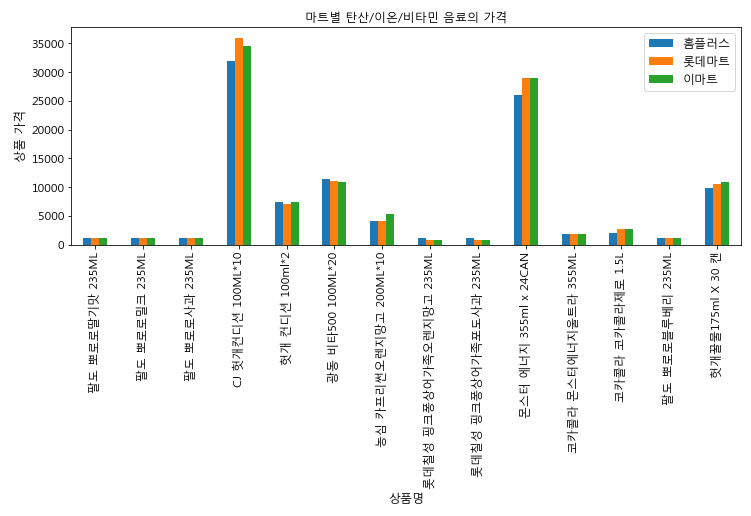

In [ ]:
# 주스
juice_df = data_frame_juice.loc[['롯데 콜드오렌지쥬스 1.89L','빙그레 따옴주스오렌지 730ML','서울 아침에주스오렌지 1.8L',
                                '서울 아침에주스오렌지 950ML','서울 아침에주스오렌지 950ML','서울 아침에주스제주감귤 950ml',
                                '서울 아침에주스포도 1.8L','서울 아침에주스포도 950ML','풀무원 아임리얼토마토 700ML',
                                '한국야쿠르트 하루야채오리지널 200ML*3']]

# 차트 종류, 제목, 차트 크기, 범례, 폰트 크기 설정
juice_df = juice_df.astype(float)
ax = juice_df.plot(kind = 'bar', title = '마트별 주스의 가격', figsize = (12, 4), legend = True, fontsize = 12)
ax.set_xlabel('상품명', fontsize = 12)
ax.set_ylabel('상품 가격', fontsize = 12)
ax.legend(['홈플러스', '롯데마트', '이마트'], fontsize = 12)
plt.show()

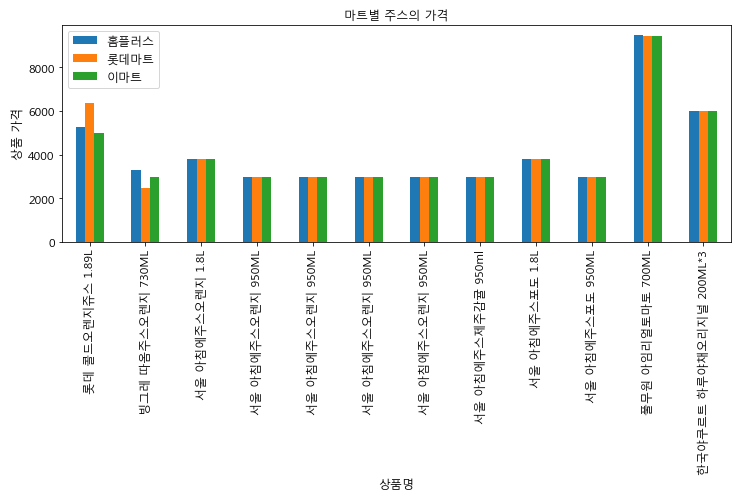

In [ ]:
# 커피/차/전통음료
tea_df = data_frame_tea.loc[['롯데칠성 칸타타스위트아메리카노 275ML','롯데칠성 칸타타프리미엄라떼 275ML',
                               '[롯데] 칸타타 콘트라베이스 콜드브루','광동 힘찬하루헛개차 1.5L','동서식품 스타벅스프라푸치노 281ML',
                               '동서식품 스타벅스프라푸치노모카 281ML','롯데칠성 칸타타콘트라베이스콜드브루 500ML',
                               '매일 바리스타로슈거에스프레소 250ML','매일 바리스타에스프레소라떼 250ML',
                               '서울우유 TOP마일드에스프레소라떼 300ML','서울우유 TOP볼드에스프레소라떼 300ML','서울우유 스타벅스라떼 270ML',
                               '아임흑현미410ml X 20 PET','웅진 하늘보리 1.5L','팔도 비락수정과 1.8L','팔도 비락식혜 1.8L']]

# 차트 종류, 제목, 차트 크기, 범례, 폰트 크기 설정
tea_df = tea_df.astype(float)
ax = tea_df.plot(kind = 'bar', title = '마트별 커피/차/전통음료의 가격', figsize = (12, 4), legend = True, fontsize = 12)
ax.set_xlabel('상품명', fontsize = 12)
ax.set_ylabel('상품 가격', fontsize = 12)
ax.legend(['홈플러스', '롯데마트', '이마트'], fontsize = 12)
plt.show()

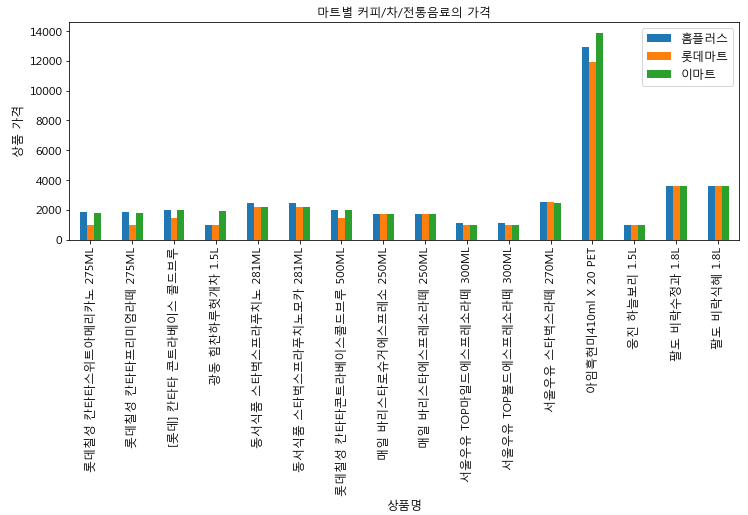

In [ ]:
# 생수/탄산수
water_df = data_frame_water.loc[['해태음료 강원평창수 500ML*20','농심 백산수 500ML x 20병','농심 백산수330ML','동원 동원샘물 2L x 6병',
                               '동원 동원샘물 500ML X 20병','롯데칠성 아이시스8.0 2L','롯데칠성 아이시스8.0 500ML',
                               '초정탄산수(플레인)500ml x 20 Pet','초정탄산음료(라임)350mlx20PET','초정탄산음료(라임)500ml x 20 Pet',
                               '초정탄산음료(레몬)350mlx20PET','초정탄산음료(레몬)500ml x 20 Pet','초정탄산음료(자몽)350mlx20PET',
                               '초정탄산음료(자몽)500ml x 20 Pet','해태음료 강원평창수 500ML x 20병']]

# 차트 종류, 제목, 차트 크기, 범례, 폰트 크기 설정
water_df = water_df.astype(float)
ax = water_df.plot(kind = 'bar', title = '마트별 생수/탄산수의 가격', figsize = (12, 4), legend = True, fontsize = 12)
ax.set_xlabel('상품명', fontsize = 12)
ax.set_ylabel('상품 가격', fontsize = 12)
ax.legend(['홈플러스', '롯데마트', '이마트'], fontsize = 12)
plt.show()

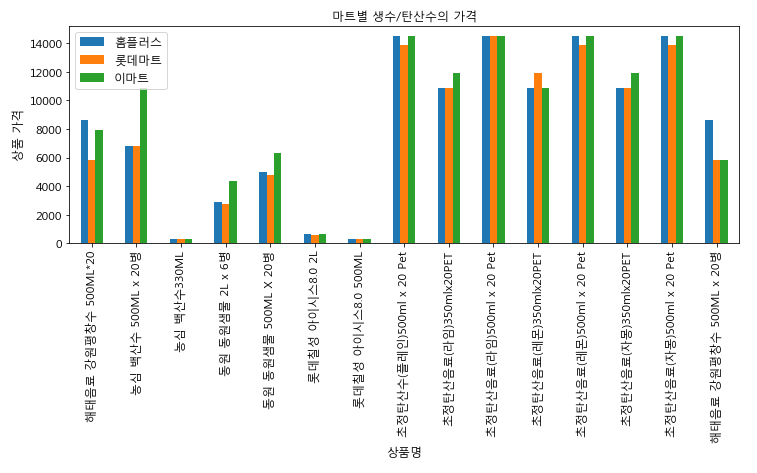

In [ ]:
# 라면
ramen_df = data_frame_ramen.loc[['농심 사리곰탕큰사발 111G','삼양 까르보불닭볶음면큰컵 105g','삼양식품_까르보불닭볶음면_130G*4입',
                                '삼양 불닭볶음면큰컵 105g','삼양 불닭볶음면 140gX5입','삼양 불닭볶음면 소컵 70gX6입',
                                '삼양 짜장불닭볶음면큰컵 105g','오뚜기 쇠고기미역국라면큰컵 100G','오뚜기 쇠고기미역국라면 115G*4입',
                                '오뚜기 열라면큰컵 105G','오뚜기 오동통면용기 120G*4입','오뚜기 진라면순한맛 120G*5입',
                                '오뚜기 진라면소컵매운맛 65G*6입','팔도 도시락 86G','팔도 비빔면  130G*5입','팔도 쫄비빔면  130G*5입']]

# 차트 종류, 제목, 차트 크기, 범례, 폰트 크기 설정
ramen_df = ramen_df.astype(float)
ax = ramen_df.plot(kind = 'bar', title = '마트별 라면의 가격', figsize = (12, 4), legend = True, fontsize = 12)
ax.set_xlabel('상품명', fontsize = 12)
ax.set_ylabel('상품 가격', fontsize = 12)
ax.legend(['홈플러스', '롯데마트', '이마트'], fontsize = 12)
plt.show()

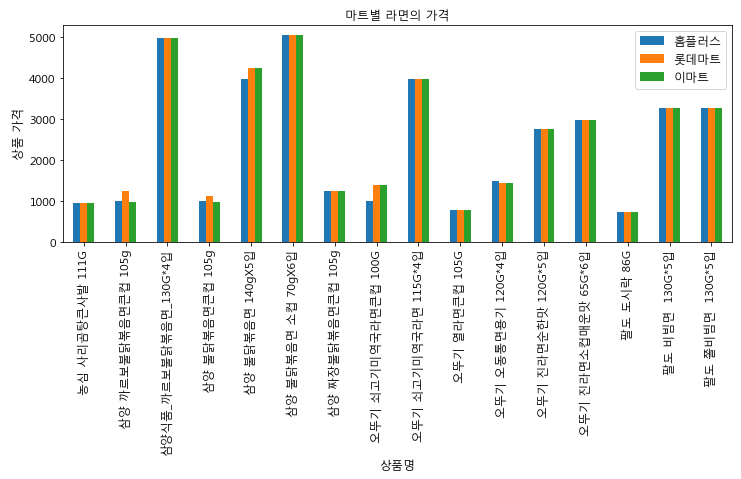

# 결론

### 우유
대부분 가격이 비슷하나 홈플러스가 가장 비싸다.

### 탄산/이온/비타민음료
대체적으로 홈플러스가 가장 싸고 롯데마트가 비싸다.

### 주스
가격이 다 비슷하다.

### 커피/차/전통음료
롯데마트가 저렴하고 홈플러스와 이마트가 비싸다.

### 생수/탄산수
낱개로 구매시에는 가격이 대부분 비슷하나 대량 구매시에는 롯데마트가 가장 저렴하고 이마트가 가장 비싸다.

### 라면
대부분 가격이 비슷하나 홈플러스가 저렴하고 롯데마트가 비싸다.

### 종합
전체적으로 홈플러스가 싸고 롯데마트와 이마트가 비싸다.

# 참고문헌

- 웹 크롤링 및 그래프 그리기: 2019다솜학기중교육_7.pptx
- 정규 표현식: 2019다솜학기중교육_9.pptx
- Pagination 된 글 크롤링 하기: https://l0o02.github.io/2018/06/14/python-crawling-pagination-1/
- 점프 투 파이썬/정규 표현식: https://wikidocs.net/1669
- 두 문자열 사이의 유사도 백분율: https://codeday.me/ko/qa/20190318/29704.html